# 78. GPU上での学習
問題77のコードを改変し，GPU上で学習を実行せよ．


In [5]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(300, 4),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
model = SimpleNet().to(device)
print(model)

Using cuda device
SimpleNet(
  (linear_stack): Sequential(
    (0): Linear(in_features=300, out_features=4, bias=True)
    (1): Softmax(dim=1)
  )
)


In [3]:
data_path = "/content/drive/MyDrive/data_nlp100_08/"

train_X = torch.from_numpy(np.loadtxt(data_path+"train_X")).float().to(device)
train_y = torch.from_numpy(np.loadtxt(data_path+"train_y")).long().to(device)
train_dataset = torch.utils.data.TensorDataset(train_X, train_y)
train_dataloader = torch.utils.data.DataLoader(train_dataset)

test_X = torch.from_numpy(np.loadtxt(data_path+"test_X")).float().to(device)
test_y = torch.from_numpy(np.loadtxt(data_path+"test_y")).long().to(device)
test_dataset = torch.utils.data.TensorDataset(test_X, test_y)
test_dataloader = torch.utils.data.DataLoader(test_dataset)

valid_X = torch.from_numpy(np.loadtxt(data_path+"valid_X")).float().to(device)
valid_y = torch.from_numpy(np.loadtxt(data_path+"valid_y")).long().to(device)
valid_dataset = torch.utils.data.TensorDataset(valid_X, valid_y)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset)

In [14]:
learning_rate = 1e-3
epochs = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return test_loss, correct

In [ ]:
import time
times = []
sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for size in sizes:
    train_dataloader = DataLoader(train_dataset, batch_size=size)
    start = time.time()
    train_loop(train_dataloader, model, loss_fn, optimizer)
    elapsed_time = time.time() - start
    times.append(elapsed_time)

In [ ]:
times

[9.62518310546875,
 4.713830947875977,
 2.3764243125915527,
 1.2369146347045898,
 0.6518819332122803,
 0.3664407730102539,
 0.21496224403381348,
 0.13606667518615723,
 0.10181784629821777,
 0.09597921371459961]

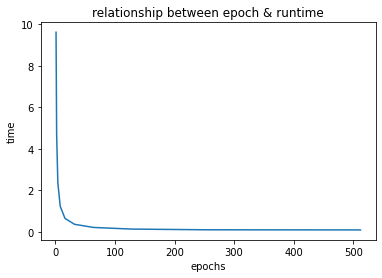

In [ ]:
plt.plot(sizes, times)
plt.xlabel("epochs")
plt.ylabel("time")
plt.title("relationship between epoch & runtime")
plt.show()

# 79. 多層ニューラルネットワーク
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

In [73]:
class MultilayerNeuralNetwork(nn.Module):
  def __init__(self):
    super(MultilayerNeuralNetwork, self).__init__()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(300, 128),
      nn.ReLU(),
      nn.Linear(128, 32),
      nn.ReLU(),
      nn.Linear(32, 4),
      nn.Softmax(dim=1)
    )

  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
model = MultilayerNeuralNetwork().to(device)
print(model)

Using cuda device
MultilayerNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=300, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=4, bias=True)
    (5): Softmax(dim=1)
  )
)


In [79]:
import matplotlib.pyplot as plt
learning_rate = 1e-3
epochs = 3000
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return test_loss, correct

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1751
-------------------------------
loss: 1.1549897254584078, accuracy: 0.5795539730134932

Epoch 1752
-------------------------------
loss: 1.154986586042507, accuracy: 0.5795539730134932

Epoch 1753
-------------------------------
loss: 1.1549834325285016, accuracy: 0.5795539730134932

Epoch 1754
-------------------------------
loss: 1.154980288829632, accuracy: 0.5795539730134932

Epoch 1755
-------------------------------
loss: 1.1549771658317771, accuracy: 0.579647676161919

Epoch 1756
-------------------------------
loss: 1.1549740187422244, accuracy: 0.579647676161919

Epoch 1757
-------------------------------
loss: 1.1549708875353464, accuracy: 0.579647676161919

Epoch 1758
-------------------------------
loss: 1.1549677632882924, accuracy: 0.579647676161919

Epoch 1759
-------------------------------
loss: 1.1549646440380348, accuracy: 0.579647676161919

Epoch 1760
-------------------------------
loss: 1.1549615151510981, accuracy: 0.579

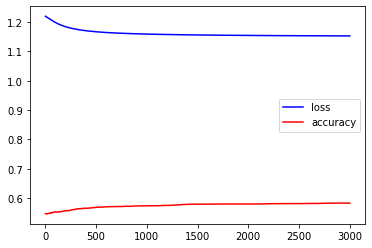

Done!


In [80]:
train_dataloader = DataLoader(train_dataset, batch_size=32)

x = [i for i in range(1, epochs+1)]
losses = []
acus = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    loss, accuracy = test_loop(train_dataloader, model, loss_fn)
    print(f"loss: {loss}, accuracy: {accuracy}\n")
    losses.append(loss)
    acus.append(accuracy)
    outfile = f"./checkpoint/out_3000_{t:0=2}.cpt"
    torch.save(
        {'iter': t,
        'model_state_dict': model.state_dict(),
        'opt_state_dict': optimizer.state_dict(),
        'loss': losses,
        }, outfile
    )
plt.plot(x, losses, color="b", label="loss")
plt.plot(x, acus, color="r", label="accuracy")
plt.legend()
plt.show()
print("Done!")